In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

#import tensorflow libraries 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD
import seaborn as sns
from keras.models import Sequential

In [2]:
df = pd.read_csv("data/cleaned_data1.csv")
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [3]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(X)
X = scaler.transform(X)

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=7, n_components=10)
X = lle.fit_transform(X)

C:\Users\pavithra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'LLE2')

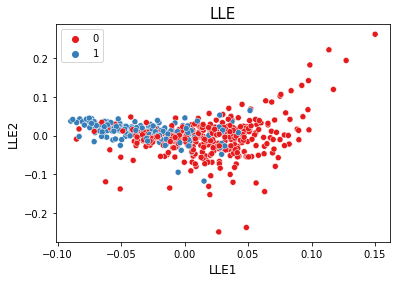

In [5]:
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='Set1')
plt.title("LLE", fontsize=15)
plt.xlabel("LLE1", fontsize=12)
plt.ylabel("LLE2", fontsize=12)

In [6]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [7]:
n_features = train_features.shape[1]
n_features

10

# ANN
RMSProp (Root Mean Square Propagation)

In [8]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
n_epochs=100
learning_rate=0.0001
decay_rate = learning_rate / n_epochs
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001,momentum=0.8,decay=decay_rate)

#Compile the model
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

#fit the model
history2 = model.fit(train_features, train_target, epochs=n_epochs,validation_data=(test_features,test_target), batch_size=32, verbose=0)

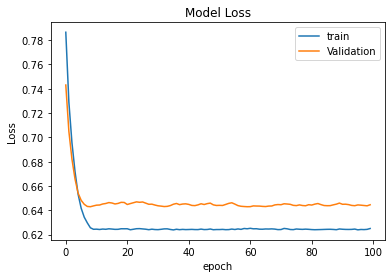

In [10]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

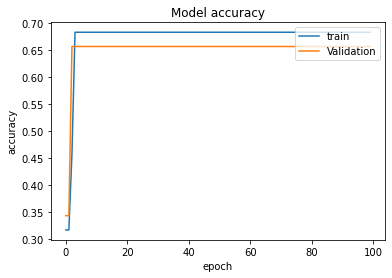

In [11]:
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

Evaluate the model

In [12]:
loss, acc = model.evaluate(test_features, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 65.714


Confusion matrix

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[115,   0],
       [ 60,   0]], dtype=int64)

In [14]:
print('ANN: \n', classification_report(test_target, data),'\n')

ANN: 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       115
           1       0.00      0.00      0.00        60

    accuracy                           0.66       175
   macro avg       0.33      0.50      0.40       175
weighted avg       0.43      0.66      0.52       175
 



C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Validation

from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
RMSE_test = sqrt(mean_squared_error(test_target, prediction)) 

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(train_features)
#calculate RMSE
RMSE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning RMSE: %.4f'%RMSE_train)
print('\n')
print('Testing RMSE: %.4f'%RMSE_test)

Traning RMSE: 0.4650


Testing RMSE: 0.4754


In [16]:
#Validation

from sklearn.metrics import mean_absolute_error
from math import sqrt

#calculate RMSE
MAE_test = mean_absolute_error(test_target, prediction)

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(train_features)
#calculate RMSE
MAE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning MAE: %.4f'%MAE_train)
print('\n')
print('Testing MAE: %.4f'%MAE_test)

Traning MAE: 0.4650


Testing MAE: 0.4420
